# import libraries

In [6]:
import ee
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Authentication and Initialization
  -Before you can make requests to Earth Engine through a client library, you must authenticate

In [8]:
ee.Authenticate()

True

In [9]:
ee.Initialize()

# Getting statistics of the points

In [11]:
#dowenload the image collection and filter it with date and get the median image 
dataset = ee.ImageCollection('MODIS/061/MOD09A1').filterDate('2022-09-01', '2022-09-30').median()  

In [12]:
# Define the points (coordinates) we want to make analysis on it
points = [
    [30.488472, 31.173472],
    [30.524722, 31.151861],
    [30.566028, 31.130972],
    [30.647556, 31.077806],
    [30.734028, 31.028500],
    [30.807556, 31.013361],
    [30.790639, 30.965194],
    [30.801278, 30.913278],
    [30.815306, 30.904389],
    [30.848333, 30.901222],
    [30.876917, 30.873500],
    [30.899056, 30.856250],
    [30.930333, 30.835639],
    [30.961583, 30.783083],
    [31.003111, 30.759333],
    [31.043556, 30.735694],
    [31.085667, 30.727861],
    [31.101222, 30.683639],
    [31.143611, 30.645361],
    [31.182500, 30.600361],
    [31.207500,30.569444],
    [31.224444,30.531583],
    [31.264361,30.518389],
    [31.311250,30.515528],
    [31.344417,30.482861],
    [30.851444,31.030083],
    [30.894389,31.024361],
    [30.893667,31.024667],
    [30.931611,30.990083],
    [30.980056,30.970417],
    [31.031639,30.961556],
    [31.085750,30.965417],
    [31.142111,30.968861],
    [31.214722,30.984111],
    [31.268806,30.990528],
    [31.261778,31.049611],
    [31.278194,31.093417],
    [31.328944,31.132139],
    [31.399000,31.125000],
    [31.471750,31.126861],
    [31.526444,31.140306],
    [31.565361,31.081889],
    [31.586472,31.052500],
    [31.412167,30.451000],
    [31.340417,30.366278],
    [31.205000,30.091444],
    [31.167278,30.069167],
    [31.128167,30.102194],
    [31.120861,30.164528],
    [31.108250,30.211944],
    [31.086417,30.294417],
    [31.069194,30.359806],
    [31.013250,30.473583],
]

In [13]:
# Create a feature collection from the points
features = ee.FeatureCollection([ee.Feature(ee.Geometry.Point(coord)) for coord in points])

# Function to get statistics for each point
def get_statistics(feature):
    point = feature.geometry()
    # Calculate the median for each band in the median image
    stats = dataset.reduceRegion(
        reducer=ee.Reducer.median(),
        geometry=point,
        scale=30  # resolution in meters
    )
    return feature.set(stats)

In [14]:
# Apply the function to each feature in the features collection
stats_features = features.map(get_statistics)

# Prepare to create the statistics data table to store the result

In [ ]:
# Prepare to create the statistics data table
data_table = {
    'longitude': [],
    'latitude': [],
    'sur_refl_b01': [],
    'sur_refl_b02': [],
    'sur_refl_b03': [],
    'sur_refl_b04': [],
    'sur_refl_b05': [],
    'sur_refl_b06': [],
    'sur_refl_b07': []
}

In [16]:
# Evaluate the feature collection
stats_features.getInfo().get('features', [])
for f in stats_features.getInfo().get('features', []):
    coords = f['geometry']['coordinates']
    properties = f['properties']
    
    data_table['longitude'].append(coords[0])
    data_table['latitude'].append(coords[1])
    data_table['sur_refl_b01'].append(properties.get('sur_refl_b01'))
    data_table['sur_refl_b02'].append(properties.get('sur_refl_b02'))
    data_table['sur_refl_b03'].append(properties.get('sur_refl_b03'))
    data_table['sur_refl_b04'].append(properties.get('sur_refl_b04'))
    data_table['sur_refl_b05'].append(properties.get('sur_refl_b05'))
    data_table['sur_refl_b06'].append(properties.get('sur_refl_b06'))
    data_table['sur_refl_b07'].append(properties.get('sur_refl_b07'))

In [17]:
# Create a DataFrame to display statistics
df = pd.DataFrame(data_table)

# Print the DataFrame
print(df)
# save result to csv file
csv_filename = 'modis_statistics_results.csv'
df.to_csv(csv_filename, index=False)
print(f'Results saved to {csv_filename}')

    longitude   latitude  sur_refl_b01  sur_refl_b02  sur_refl_b03  \
0   30.488472  31.173472           734          3167           448   
1   30.524722  31.151861           879          3139           495   
2   30.566028  31.130972           890          3036           490   
3   30.647556  31.077806           871          2739           476   
4   30.734028  31.028500           795          2775           479   
5   30.807556  31.013361           713          2307           442   
6   30.790639  30.965194           863          2228           475   
7   30.801278  30.913278           738          2396           446   
8   30.815306  30.904389           752          1875           442   
9   30.848333  30.901222           728          2722           414   
10  30.876917  30.873500           810          2232           478   
11  30.899056  30.856250           854          2281           447   
12  30.930333  30.835639           876          2587           447   
13  30.961583  30.78

# calculate the correlation 

In [19]:
data=pd.read_csv('modis_statistics_results.csv')
data.head()

,longitude,latitude,sur_refl_b01,sur_refl_b02,sur_refl_b03,sur_refl_b04,sur_refl_b05,sur_refl_b06,sur_refl_b07
0,30.488472,31.173472,734,3167,448,776,2741,1866,981
1,30.524722,31.151861,879,3139,495,909,2913,1957,1165
2,30.566028,31.130972,890,3036,490,864,2754,1987,1204
3,30.647556,31.077806,871,2739,476,789,2605,1858,1174
4,30.734028,31.028500,795,2775,479,887,2363,1862,1125


In [20]:
# add the HM concentration column to df
data['HM']=[
384.9,
318.3,
342.4,
440.8,
397.6,
380.4,
381.2,
414.5,
333.9,
362.8,
366.9,
407.6,
373.5,
382.0,
385.6,
356.8,
293.4,
332.1,
363.2,
429.9,
378.6,
419.2,
399.6,
189.0,
427.1,
429.2,
392.4,
387.6,
437.0,
444.5,
410.6,
453.4,
409.2,
448.0,
376.7,
395.0,
397.7,
347.8,
328.7,
292.1,
222.7,
152.0,
141.5,
287.4,
340.4,
318.1,
309.6,
325.8,
246.8,
231.3,
326.1,
276.7,
340.9]

In [21]:
# split the target(HM) and get correlation between it and features(bands)
target='HM'
#pearson correlation
corr=data.corr()[target]
print(corr)

longitude      -0.457153
latitude        0.234361
sur_refl_b01   -0.465879
sur_refl_b02    0.039542
sur_refl_b03   -0.350594
sur_refl_b04   -0.279618
sur_refl_b05   -0.240350
sur_refl_b06   -0.521914
sur_refl_b07   -0.548129
HM              1.000000
Name: HM, dtype: float64


In [22]:
# get spearman correlation
corr=data.corr(method='spearman')[target]
print(corr)

longitude      -0.338978
latitude        0.209160
sur_refl_b01   -0.468359
sur_refl_b02    0.165786
sur_refl_b03   -0.418903
sur_refl_b04   -0.224449
sur_refl_b05   -0.070436
sur_refl_b06   -0.444382
sur_refl_b07   -0.586139
HM              1.000000
Name: HM, dtype: float64


In [23]:
#kendall corr
corr2=data.corr(method='kendall')[target]
print(corr2)

longitude      -0.238026
latitude        0.166909
sur_refl_b01   -0.323519
sur_refl_b02    0.132171
sur_refl_b03   -0.293198
sur_refl_b04   -0.137981
sur_refl_b05   -0.035598
sur_refl_b06   -0.294844
sur_refl_b07   -0.392157
HM              1.000000
Name: HM, dtype: float64


In [24]:
# numpy correlation
x=data.drop(columns='HM')
y=data['HM']
# Calculate the correlation only if they have the same number of rows
if x.shape[0] == y.shape[0]:
    correlation_matrix = np.corrcoef(x.T, y)  # Transpose x to have features as rows
    print("Correlation matrix:\n", correlation_matrix)
else:
    print("Shape mismatch: Cannot calculate correlation.")

Correlation matrix:
 [[ 1.         -0.23913746  0.47576693 -0.16845993  0.37193423  0.29476004
   0.08102005  0.48614753  0.46895899 -0.4571532 ]
 [-0.23913746  1.         -0.10380973  0.44313573 -0.04453181  0.0758603
   0.34067603 -0.02851672 -0.24178631  0.2343615 ]
 [ 0.47576693 -0.10380973  1.         -0.18034639  0.93447776  0.85566787
   0.09404469  0.76338988  0.92332605 -0.4658789 ]
 [-0.16845993  0.44313573 -0.18034639  1.         -0.09094514  0.23460938
   0.84920813  0.1604612  -0.30911047  0.03954229]
 [ 0.37193423 -0.04453181  0.93447776 -0.09094514  1.          0.89541522
   0.11968469  0.71540942  0.82873934 -0.35059424]
 [ 0.29476004  0.0758603   0.85566787  0.23460938  0.89541522  1.
   0.37045296  0.72810548  0.70400378 -0.27961819]
 [ 0.08102005  0.34067603  0.09404469  0.84920813  0.11968469  0.37045296
   1.          0.52788136  0.05599781 -0.24035016]
 [ 0.48614753 -0.02851672  0.76338988  0.1604612   0.71540942  0.72810548
   0.52788136  1.          0.81136064 -

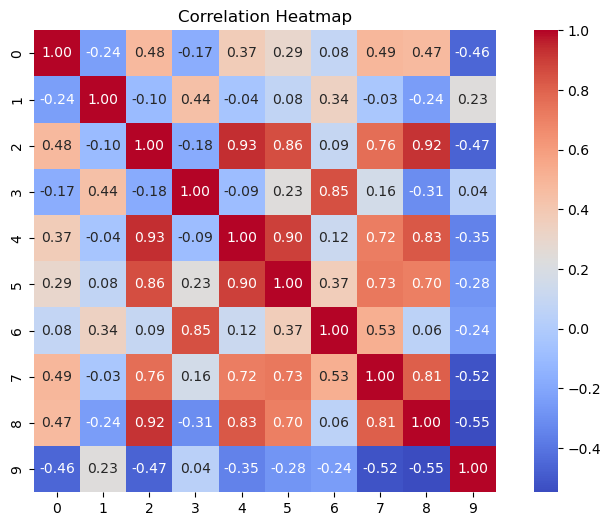

In [25]:
# Visualize the correlation using a heatmap to numpy correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()